In [2]:
import numpy as np
import pandas as pd


from sklearn import feature_extraction, model_selection, naive_bayes, metrics, svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.metrics import classification_report 

import matplotlib.pyplot as plt
from collections import Counter

In [6]:
df = pd.read_csv("news_fake-n-true.csv")
df.head(4)

,Unnamed: 0,title,text,subject,date,label
0,0,ADVISORY: Story on Kushner visiting Iraq withd...,(Reuters) - The story “Trump son-in-law Jared ...,politicsNews,"April 3, 2017",1
1,1,Kasich campaign denies report of Romney endors...,WASHINGTON (Reuters) - Republican presidential...,politicsNews,"March 14, 2016",1
2,2,WATCH: Colbert Devises Perfect Advertisement ...,If America is going to end the day Donald Trum...,News,"May 20, 2016",0
3,3,Trump says hopes for Cuban 'freedom' after Cas...,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",politicsNews,"November 26, 2016",1


In [7]:
df_clean = df.drop(['Unnamed: 0','title','subject','date'], axis=1)

display(data_clean)

,text,label
0,(Reuters) - The story “Trump son-in-law Jared ...,1
1,WASHINGTON (Reuters) - Republican presidential...,1
2,If America is going to end the day Donald Trum...,0
3,"WEST PALM BEACH, Fla. (Reuters) - U.S. Preside...",1
4,"Well, it seems that despite the efforts of not...",0
...,...,...
44893,Donald Trump s economic proposals would be dis...,0
44894,INDIANAPOLIS (Reuters) - President Donald Trum...,1
44895,During a private meeting of the most senior Re...,0
44896,"AMMAN (Reuters) - Sabih al-Masri, Jordan s mos...",1


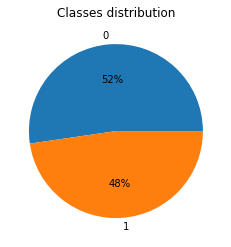

In [8]:
classes =pd.value_counts(df_clean["label"])

classes.plot(kind = 'pie',  autopct='%0.f%%') 
plt.title("Classes distribution")
plt.ylabel('')

plt.show()

In [31]:
from sklearn.model_selection import train_test_split

X = df['text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [35]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Naive Bayes:
text_clf_nb = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', MultinomialNB()),
])

text_clf_nb.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [36]:
predictions = text_clf_nb.predict(X_test)

In [37]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[7416  380]
 [ 513 6508]]


In [38]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7796
           1       0.94      0.93      0.94      7021

    accuracy                           0.94     14817
   macro avg       0.94      0.94      0.94     14817
weighted avg       0.94      0.94      0.94     14817



In [ ]:
#LinearRegression

In [39]:
from sklearn.svm import LinearSVC
text_clf_lsvc = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', LinearSVC()),])

In [40]:
text_clf_lsvc.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])

In [44]:
predictions = text_clf_lsvc.predict(X_test)

In [45]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

[[7759   37]
 [  40 6981]]


In [46]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7796
           1       0.99      0.99      0.99      7021

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



In [ ]:
#Decision Trees

In [47]:
from sklearn.tree import DecisionTreeClassifier
text_clf_tree = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', DecisionTreeClassifier()),])
text_clf_tree.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', DecisionTreeClassifier())])

In [48]:
predictions = text_clf_tree.predict(X_test)

In [49]:
print(metrics.confusion_matrix(y_test,predictions))

[[7769   27]
 [  33 6988]]


In [50]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7796
           1       1.00      1.00      1.00      7021

    accuracy                           1.00     14817
   macro avg       1.00      1.00      1.00     14817
weighted avg       1.00      1.00      1.00     14817



In [ ]:
#Random Forest

In [54]:
from sklearn.ensemble import RandomForestClassifier
text_clf_random = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', RandomForestClassifier()),])
text_clf_random.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', RandomForestClassifier())])

In [55]:
predictions = text_clf_random.predict(X_test)

In [56]:
print(metrics.confusion_matrix(y_test,predictions))

[[7721   75]
 [ 101 6920]]


In [57]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7796
           1       0.99      0.99      0.99      7021

    accuracy                           0.99     14817
   macro avg       0.99      0.99      0.99     14817
weighted avg       0.99      0.99      0.99     14817



In [ ]:
#Boosting

In [58]:
from sklearn.ensemble import GradientBoostingClassifier
text_clf_boosting = Pipeline([('tfidf', TfidfVectorizer()),
                     ('clf', GradientBoostingClassifier()),])
text_clf_boosting.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('clf', GradientBoostingClassifier())])

In [59]:
predictions = text_clf_boosting.predict(X_test)
print(metrics.confusion_matrix(y_test,predictions))

[[7750   46]
 [  25 6996]]


In [60]:
print(metrics.classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7796
           1       0.99      1.00      0.99      7021

    accuracy                           1.00     14817
   macro avg       1.00      1.00      1.00     14817
weighted avg       1.00      1.00      1.00     14817



In [ ]:
# Если проаннализировать все 5 методов, то луше всех справился метод Decision Tree - у него и precision и recall = 1